In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('Data/sloths22.csv')

In [4]:
df = df[['Pitcher', 'Tilt','TaggedPitchType','SpinRate']]

In [5]:
pitcher_name = "Joey Kahwaji"

In [6]:
df = df[df['Pitcher']==pitcher_name]

In [7]:
# Function to map clock time (HH:MM) to angle (in radians)
def time_to_angle(time_str):
    try:
        # Parse HH:MM format
        hour, minute = map(int, time_str.split(':'))
        total_minutes = hour * 60 + minute
        if total_minutes >= 12 * 60:
            total_minutes -= 12 * 60  # Normalize to 0-720 minutes
        # Map to standard clock angles: 12:00 = 0°, 3:00 = 90°, 6:00 = 180°, 9:00 = 270°
        angle_deg = (total_minutes / (12 * 60)) * 360
        return np.radians(angle_deg)
    except (ValueError, AttributeError):
        print(f"Invalid time format: {time_str}. Defaulting to 12:00.")
        return 0  # Default to 12:00


Invalid time format: nan. Defaulting to 12:00.
Invalid time format: nan. Defaulting to 12:00.
Invalid time format: nan. Defaulting to 12:00.
Invalid time format: nan. Defaulting to 12:00.
Invalid time format: nan. Defaulting to 12:00.
Invalid time format: nan. Defaulting to 12:00.
Invalid time format: nan. Defaulting to 12:00.
Invalid time format: nan. Defaulting to 12:00.
Invalid time format: nan. Defaulting to 12:00.
Invalid time format: nan. Defaulting to 12:00.
Invalid time format: nan. Defaulting to 12:00.


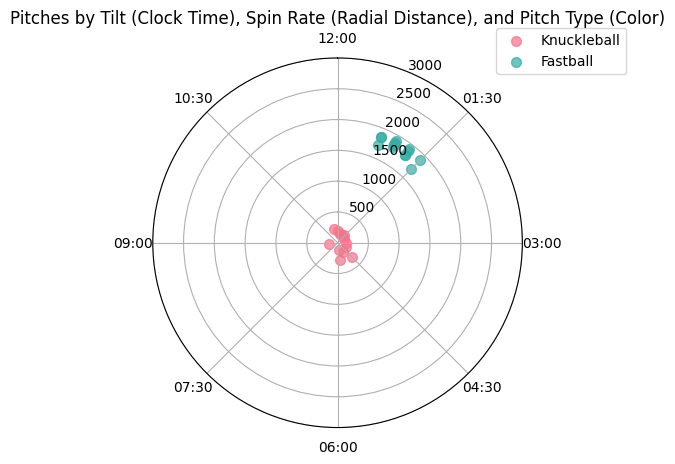

In [8]:
# Calculate angles for each tilt
df['Angle'] = df['Tilt'].apply(time_to_angle)  # Assuming time_to_angle is defined

# Set up polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Get unique pitch types for coloring
pitch_types = df['TaggedPitchType'].unique()
colors = sns.color_palette("husl", len(pitch_types))  # Distinct colors
pitch_type_colors = dict(zip(pitch_types, colors))

# Plot circles for each pitch, colored by TaggedPitchType, with SpinRate as radial distance
for pitch_type in pitch_types:
    df_pitch = df[df['TaggedPitchType'] == pitch_type]
    # Map SpinRate to radial distance (scale as needed)
    radial = df_pitch['SpinRate'] / 3000  # Scale SpinRate for visibility (adjust divisor as needed)
    sizes = 50  # Fixed size for scatter points (or scale differently if desired)
    ax.scatter(df_pitch['Angle'], radial, 
               s=sizes, c=[pitch_type_colors[pitch_type]], label=pitch_type, alpha=0.7)

# Customize the plot
ax.set_theta_direction(-1)  # Clockwise
ax.set_theta_zero_location('N')  # 12 o'clock at the top (0°)
ax.set_rlim(0, .5)  # Radial limit for visibility (adjust based on SpinRate scaling)
# Set radial labels to correspond to SpinRate
spin_rate_labels = ['500', '1000', '1500', '2000', '2500', '3000']
radial_ticks = [float(x) / 3000 for x in spin_rate_labels]  # Scale ticks to match SpinRate scaling
ax.set_yticks(radial_ticks)
ax.set_yticklabels(spin_rate_labels)

# Set clock face labels
key_times = ['12:00', '01:30', '03:00', '04:30', '06:00', '07:30', '09:00', '10:30']
key_angles = [time_to_angle(t) for t in key_times]
ax.set_xticks(key_angles)
ax.set_xticklabels(key_times)

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Pitches by Tilt (Clock Time), Spin Rate (Radial Distance), and Pitch Type (Color)')

# Show plot
plt.show()
